# Soccer Analytics -  Predicting Soccer Match Results to Improve Chances of Winning Bets 

### The final part of our project is prediction of results. Here we are applying three models on the transformed dataset - Logistic Regression, SVC and Random Forest algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
finaltrainingdf=pd.read_csv('Soccer_Training_Dataset.csv')
finaltestdf=pd.read_csv('Soccer_Test_Dataset.csv')
finaldf=pd.read_csv('trainingdatasetcomplete.csv')
trainingdf = finaldf[(finaldf['season']==2016) | (finaldf['season']==2017)]
testdf= finaldf[(finaldf['season']==2018)]

In [3]:
finaltrainingdf=finaltrainingdf[['H76+_shotsA', 'HPY_finish_flag', 'HMissedShots_shotsA',
       'HRight_PY_finish_flag', 'LY_Hdeep_y', 'LY_AxG_y', 'HOpenPlay_goalsF',
       'A76+_shotsA', 'HshotOboxTotal_xGA', 'HRight_Pts', 'LY_HxG_y',
       'H76+_xGD', 'HGoal diff -1_xGA', 'AshotSixYardBox_shotsA',
       'ASavedShot_shotsA', 'L2LY_Hppda', 'HshotSixYardBox_xGA',
       'H46-60_shotsA', 'HMissedShots_xGA', 'L2LY_Axpts', 'HshotOboxTotal_xGF',
       'L2LY_Hshotstrgt', 'AFromCorner_xGA', 'AGoal diff +1_shotsF',
       'HGoal_shotsF', 'A31-45_shotsF', 'L2LY_Dchance', 'LY_Hgoals_y',
       'HBlockedShot_shotsF', 'HFromCorner_xGD', 'HRight_Avg_Finish',
       'L2LY_Achance', 'AGoal diff -1_timeF', 'AMissedShots_xGD',
       'HSetPiece_shotsF','Hteam_Arsenal'
,'Hteam_Bournemouth'
,'Hteam_Chelsea'
,'Hteam_Crystal Palace'
,'Hteam_Everton'
,'Hteam_Leicester'
,'Hteam_Liverpool'
,'Hteam_Man City'
,'Hteam_Man United'
,'Hteam_Southampton'
,'Hteam_Tottenham'
,'Hteam_Watford'
,'Hteam_West Ham'
,'Ateam_Arsenal'
,'Ateam_Bournemouth'
,'Ateam_Chelsea'
,'Ateam_Crystal Palace'
,'Ateam_Everton'
,'Ateam_Leicester'
,'Ateam_Liverpool'
,'Ateam_Man City'
,'Ateam_Man United'
,'Ateam_Southampton'
,'Ateam_Tottenham'
,'Ateam_Watford'
,'Ateam_West Ham'
,'FTR_y']]

In [4]:
finaltestdf=finaltestdf[['H76+_shotsA', 'HPY_finish_flag', 'HMissedShots_shotsA',
       'HRight_PY_finish_flag', 'LY_Hdeep_y', 'LY_AxG_y', 'HOpenPlay_goalsF',
       'A76+_shotsA', 'HshotOboxTotal_xGA', 'HRight_Pts', 'LY_HxG_y',
       'H76+_xGD', 'HGoal diff -1_xGA', 'AshotSixYardBox_shotsA',
       'ASavedShot_shotsA', 'L2LY_Hppda', 'HshotSixYardBox_xGA',
       'H46-60_shotsA', 'HMissedShots_xGA', 'L2LY_Axpts', 'HshotOboxTotal_xGF',
       'L2LY_Hshotstrgt', 'AFromCorner_xGA', 'AGoal diff +1_shotsF',
       'HGoal_shotsF', 'A31-45_shotsF', 'L2LY_Dchance', 'LY_Hgoals_y',
       'HBlockedShot_shotsF', 'HFromCorner_xGD', 'HRight_Avg_Finish',
       'L2LY_Achance', 'AGoal diff -1_timeF', 'AMissedShots_xGD',
       'HSetPiece_shotsF','Hteam_Arsenal'
,'Hteam_Bournemouth'
,'Hteam_Chelsea'
,'Hteam_Crystal Palace'
,'Hteam_Everton'
,'Hteam_Leicester'
,'Hteam_Liverpool'
,'Hteam_Man City'
,'Hteam_Man United'
,'Hteam_Southampton'
,'Hteam_Tottenham'
,'Hteam_Watford'
,'Hteam_West Ham'
,'Ateam_Arsenal'
,'Ateam_Bournemouth'
,'Ateam_Chelsea'
,'Ateam_Crystal Palace'
,'Ateam_Everton'
,'Ateam_Leicester'
,'Ateam_Liverpool'
,'Ateam_Man City'
,'Ateam_Man United'
,'Ateam_Southampton'
,'Ateam_Tottenham'
,'Ateam_Watford'
,'Ateam_West Ham'
,'FTR_y']]

In [5]:
arraytrain_f = finaltrainingdf.values
arraytest_f = finaltestdf.values
lst=list(finaltrainingdf.columns)
lst.remove('FTR_y')

In [6]:
X_train = arraytrain_f[:,0:61]
Y_train = arraytrain_f[:,61]
X_test = arraytest_f[:,0:61]
Y_test = arraytest_f[:,61]

In [7]:
finaltestdf.iloc[:,:36].head(5)

,H76+_shotsA,HPY_finish_flag,HMissedShots_shotsA,HRight_PY_finish_flag,LY_Hdeep_y,LY_AxG_y,HOpenPlay_goalsF,A76+_shotsA,HshotOboxTotal_xGA,HRight_Pts,...,L2LY_Dchance,LY_Hgoals_y,HBlockedShot_shotsF,HFromCorner_xGD,HRight_Avg_Finish,L2LY_Achance,AGoal diff -1_timeF,AMissedShots_xGD,HSetPiece_shotsF,Hteam_Arsenal
0,116.5,2.0,232.0,3.0,13.0,0.67,74.0,150.5,7.723567,57.0,...,0.06,2.0,249.5,0.307900,7.0,0.01,853.0,-1.669417,28.5,0
1,95.0,1.0,159.5,3.0,19.0,0.34,100.0,178.0,4.756806,50.0,...,0.23,4.0,275.5,0.704360,10.0,0.10,912.0,-6.481132,33.5,0
2,127.5,2.0,239.5,1.0,7.0,1.93,84.0,81.5,6.951270,81.0,...,0.30,0.0,250.0,3.743238,3.0,0.54,331.5,18.947436,36.0,1
3,178.0,3.0,303.5,3.0,6.0,0.50,49.5,159.0,10.666123,44.0,...,0.19,1.0,172.0,-1.873864,12.0,0.06,1295.5,-11.615172,46.5,0
4,168.5,3.0,256.5,3.0,4.0,0.63,55.5,139.0,9.982390,48.0,...,0.17,1.0,158.5,-2.684903,10.0,0.09,832.5,1.849414,45.5,0


In [8]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train ROC score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test ROC score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train ROC score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test ROC score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

#### 1. Logistic Regression

Applying GridSearchCV for finding the optimal parameters

In [9]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'solver': ['newton-cg','sag','saga','lbfgs']}

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_grid_search = GridSearchCV(LogisticRegression(random_state = 10),lr_param_grid, cv=4, scoring='accuracy', n_jobs = -1,verbose=10)
lr_grid_search.fit(X_train, Y_train)
print("Best Parameters : {}".format(lr_grid_search.best_params_))
print("Best cross_val score : {}".format(lr_grid_search.best_score_))

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  91 out of  96 | elapsed:   18.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   19.8s finished


Best Parameters : {'C': 0.01, 'solver': 'saga'}
Best cross_val score : 0.6044444444444445


In [11]:
lr_accuracy_train = lr_grid_search.best_estimator_.score(X_train, Y_train)
lr_accuracy_test = lr_grid_search.best_estimator_.score(X_test, Y_test)

print('Logistic Regression - Train Accuracy: %.2f'%lr_accuracy_train)
print('Logistic Regression - Test Accuracy: %.2f '%lr_accuracy_test)

Logistic Regression - Train Accuracy: 0.61
Logistic Regression - Test Accuracy: 0.57 


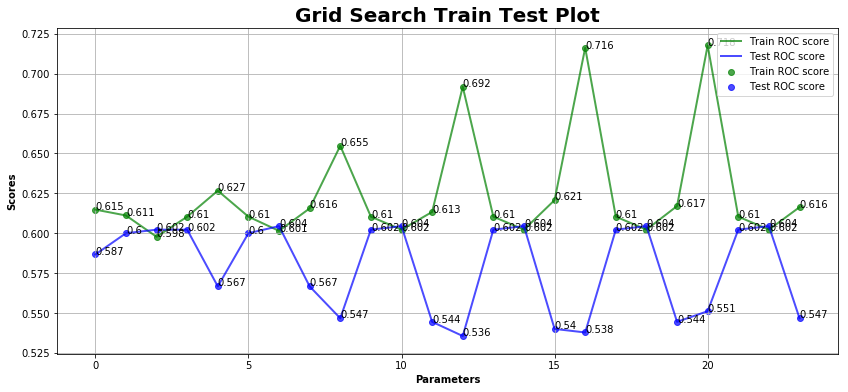

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
identifier,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
identifier_name,"'C': 0.001, 'solver': 'newton-cg'","'C': 0.001, 'solver': 'sag'","'C': 0.001, 'solver': 'saga'","'C': 0.001, 'solver': 'lbfgs'","'C': 0.01, 'solver': 'newton-cg'","'C': 0.01, 'solver': 'sag'","'C': 0.01, 'solver': 'saga'","'C': 0.01, 'solver': 'lbfgs'","'C': 0.1, 'solver': 'newton-cg'","'C': 0.1, 'solver': 'sag'",...,"'C': 1, 'solver': 'saga'","'C': 1, 'solver': 'lbfgs'","'C': 10, 'solver': 'newton-cg'","'C': 10, 'solver': 'sag'","'C': 10, 'solver': 'saga'","'C': 10, 'solver': 'lbfgs'","'C': 100, 'solver': 'newton-cg'","'C': 100, 'solver': 'sag'","'C': 100, 'solver': 'saga'","'C': 100, 'solver': 'lbfgs'"


In [12]:
lrclassresults = pd.DataFrame(lr_grid_search.cv_results_)
lrclassresults['identifier_name'] = lrclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
lrclassresults['identifier'] = (lrclassresults.index)
grid_train_test_plot(lrclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'show')
lrclassresults[['identifier','identifier_name']].transpose()

In [13]:
log_reg = LogisticRegression(random_state=0,C=0.01,solver='saga',max_iter=10000)
log_reg.fit(X_train,Y_train)
train_score = log_reg.score(X_train,Y_train)
test_score =log_reg.score(X_test,Y_test)
predictions = log_reg.predict(X_test)

In [14]:
print('Logistic Regression - Train Accuracy: %.2f'%train_score)
print('Logistic Regression - Test Accuracy: %.2f '%test_score)

Logistic Regression - Train Accuracy: 0.60
Logistic Regression - Test Accuracy: 0.53 


In [15]:
testdf= finaldf[(finaldf['season']==2018)]

In [16]:
hwin_prob=[]
draw_prob=[]
awin_prob=[]
home_team=[]
away_team=[]
model_predict_out=[]
lgcl_predict_out=[]
actual_out=[]
for i in range(0,X_test.shape[0]):
    home_team.append(testdf.HomeTeam.iloc[i])
    away_team.append(testdf.AwayTeam.iloc[i])
    hwin_prob.append(log_reg.predict_proba(X_test)[i][1])
    draw_prob.append(log_reg.predict_proba(X_test)[i][0])
    awin_prob.append(log_reg.predict_proba(X_test)[i][2])
    if (Y_test[i]==2):
        actual_out.append('Away')
    elif (Y_test[i]==1):
        actual_out.append('Home')
    else:
        actual_out.append('Draw')
    if (log_reg.predict(X_test)[i]==2):
        model_predict_out.append('Away')
    elif (log_reg.predict(X_test)[i]==1):
        model_predict_out.append('Home')
    else:
        model_predict_out.append('Draw')
    if (abs(log_reg.predict_proba(X_test)[i][1]-log_reg.predict_proba(X_test)[i][2])>log_reg.predict_proba(X_test)[i][0]):
        if (log_reg.predict_proba(X_test)[i][1]>log_reg.predict_proba(X_test)[i][2]):
            lgcl_predict_out.append('Home')
        else:
            lgcl_predict_out.append('Away')
    else:
        lgcl_predict_out.append('Draw')

In [17]:
result=pd.DataFrame(
    {'HomeTeam': home_team,
     'AwayTeam': away_team,
     'HomeWinProb': hwin_prob,
     'DrawProb': draw_prob,
     'AwayWinProb': awin_prob,
     'Prdctd_Winner': model_predict_out,
     'Lgcl_Winner': lgcl_predict_out,
     'Actual_Result':actual_out
    })

In [18]:
result.to_csv('Logisitic_Predictions.csv')

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import scikitplot as skplt
def final_metrics(log_final,y_test,y_pred_log):
    log_metrics = {'Accuracy' : metrics.accuracy_score(y_test, y_pred_log),
                     'Precision' : metrics.precision_score(y_test, y_pred_log,average=None,pos_label=3),
                     'Recall' : metrics.recall_score(y_test, y_pred_log,average=None,pos_label=3),
                     'F1 Score' : metrics.f1_score(y_test, y_pred_log,average=None,pos_label=3),
                     #'ROC-AUC Score' : metrics.roc_auc_score(y_test, y_pred_log,average=None,pos_label=3),
                    }
    df_logmetrics = pd.DataFrame.from_dict(log_metrics, orient='index',columns=['Scores'])
   # skplt.metrics.plot_confusion_matrix(y_test, y_pred_log,cmap=plt.cm.Blues)
    return df_logmetrics
def plot_roc(model,x_test,y_test):
    model_proba = model.predict_proba(x_test)
    fig = plt.figure()
    ax1 = fig.add_subplot()
    skplt.metrics.plot_roc(y_test,model_proba ,figsize = (15,7),title_fontsize='large',text_fontsize='large')                
    return None

In [20]:
final_metrics(log_reg,Y_test,predictions)

,Scores
Accuracy,0.534884
Precision,"[0.0, 0.5510204081632653, 0.5588235294117647]"
Recall,"[0.0, 0.7297297297297297, 0.59375]"
F1 Score,"[0.0, 0.6279069767441859, 0.5757575757575757]"


<Figure size 432x288 with 0 Axes>

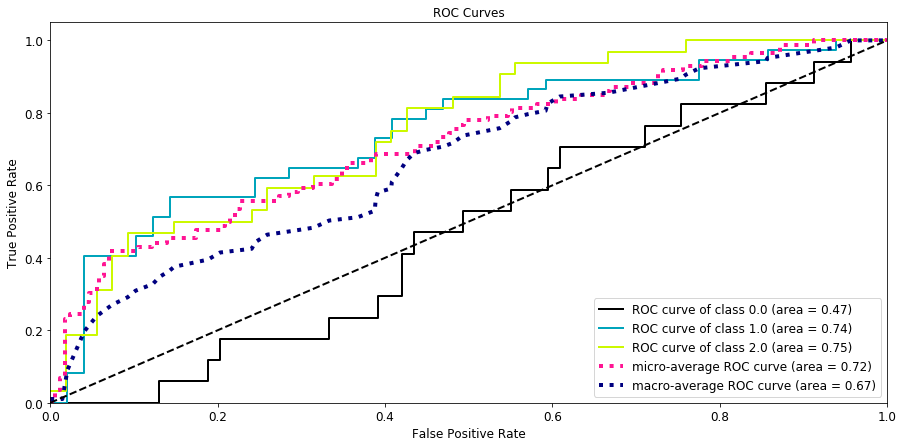

In [21]:
plot_roc(log_reg,X_test,Y_test)

#### 2. Support Vector Classifier

In [22]:
linsvc_param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l2'],'loss':['hinge','squared_hinge']},
                     {'C':[0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1'],'dual':[False],'loss':['squared_hinge']}]

In [23]:
from sklearn.svm import LinearSVC
linsvc_grid_search = GridSearchCV(LinearSVC(random_state = 10),linsvc_param_grid, cv=5, scoring='accuracy', n_jobs = -1,verbose=10)
linsvc_grid_search.fit(X_train, Y_train)
print("Best Parameters : {}".format(linsvc_grid_search.best_params_))
print("Best cross_val score : {}".format(linsvc_grid_search.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   12.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   12.5s finished


Best Parameters : {'C': 0.01, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Best cross_val score : 0.5888888888888889


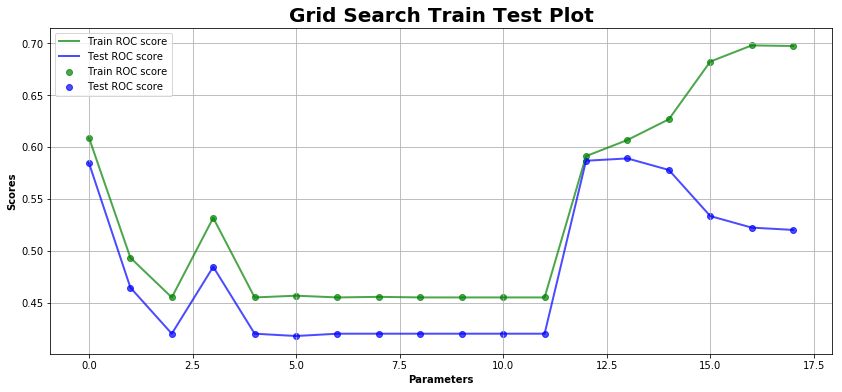

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
identifier,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
identifier_name,"'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.001, 'loss': 'squared_hinge', 'penalty'...","'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.01, 'loss': 'squared_hinge', 'penalty':...","'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.1, 'loss': 'squared_hinge', 'penalty': ...","'C': 1, 'loss': 'hinge', 'penalty': 'l2'","'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'","'C': 10, 'loss': 'hinge', 'penalty': 'l2'","'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'","'C': 100, 'loss': 'hinge', 'penalty': 'l2'","'C': 100, 'loss': 'squared_hinge', 'penalty': ...","'C': 0.001, 'dual': False, 'loss': 'squared_hi...","'C': 0.01, 'dual': False, 'loss': 'squared_hin...","'C': 0.1, 'dual': False, 'loss': 'squared_hing...","'C': 1, 'dual': False, 'loss': 'squared_hinge'...","'C': 10, 'dual': False, 'loss': 'squared_hinge...","'C': 100, 'dual': False, 'loss': 'squared_hing..."


In [24]:
linsvcclassresults = pd.DataFrame(linsvc_grid_search.cv_results_)
linsvcclassresults['identifier_name'] = linsvcclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
linsvcclassresults['identifier'] = (linsvcclassresults.index)
grid_train_test_plot(linsvcclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
linsvcclassresults[['identifier','identifier_name']].transpose()

In [25]:
lsvc_accuracy_train = linsvc_grid_search.best_estimator_.score(X_train, Y_train)
lsvc_accuracy_test = linsvc_grid_search.best_estimator_.score(X_test, Y_test)

print('Linear Support Vector Machine Classifier - Train Accuracy: %.2f'%lsvc_accuracy_train)
print('Linear Support Vector Machine Classifier - Test Accuracy: %.2f '%lsvc_accuracy_test)

Linear Support Vector Machine Classifier - Train Accuracy: 0.60
Linear Support Vector Machine Classifier - Test Accuracy: 0.56 


In [26]:
svc_reg = LinearSVC(random_state=0,C=0.01,dual= False, loss= 'squared_hinge', penalty= 'l1')
svc_reg.fit(X_train,Y_train)
train_score = svc_reg.score(X_train,Y_train)
test_score =svc_reg.score(X_test,Y_test)
predictions = svc_reg.predict(X_test)

In [27]:
print('Linear SVC Regression - Train Accuracy: %.2f'%train_score)
print('Linear SVC Regression - Test Accuracy: %.2f '%test_score)

Linear SVC Regression - Train Accuracy: 0.60
Linear SVC Regression - Test Accuracy: 0.55 


In [28]:
home_team=[]
away_team=[]
model_predict_out=[]
actual_out=[]
for i in range(0,X_test.shape[0]):
    home_team.append(testdf.HomeTeam.iloc[i])
    away_team.append(testdf.AwayTeam.iloc[i])
    if (svc_reg.predict(X_test)[i]==2):
        model_predict_out.append('Away')
    elif (svc_reg.predict(X_test)[i]==1):
        model_predict_out.append('Home')
    else:
        model_predict_out.append('Draw')
    if (Y_test[i]==2):
        actual_out.append('Away')
    elif (Y_test[i]==1):
        actual_out.append('Home')
    else:
        actual_out.append('Draw')

In [30]:
result=pd.DataFrame(
    {'HomeTeam': home_team,
     'AwayTeam': away_team,
     'Prdctd_Winner': model_predict_out,
     'Actual_Winner': actual_out
    })

In [31]:
result.to_csv('SVC_Predictions.csv')

In [32]:
final_metrics(svc_reg,Y_test,predictions)

,Scores
Accuracy,0.546512
Precision,"[0.0, 0.5272727272727272, 0.5806451612903226]"
Recall,"[0.0, 0.7837837837837838, 0.5625]"
F1 Score,"[0.0, 0.6304347826086956, 0.5714285714285715]"


#### 3. Random Forest Regression

In [33]:
feature_list = list(finaltrainingdf.columns)
feature_list.remove('FTR_y')
#feature_list.remove('Unnamed: 0')

In [34]:
rf_param_grid = [{'n_estimators':[100,500,1000,1500,1800],'criterion':['gini','entropy']}]

In [35]:
# Import the model we are using
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state = 10),rf_param_grid, cv=5, scoring='accuracy', n_jobs = -1,verbose=10)
rf_grid_search.fit(X_train, Y_train)
print("Best Parameters : {}".format(rf_grid_search.best_params_))
print("Best cross_val score : {}".format(rf_grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   22.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   25.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.1s finished


Best Parameters : {'criterion': 'entropy', 'n_estimators': 1000}
Best cross_val score : 0.5955555555555555


In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0,criterion='entropy')
# Train the model on training data
rf.fit(X_train, Y_train);

In [37]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.53 degrees.


In [38]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))

Accuracy: 0.5465116279069767


In [39]:
predictions

array([1., 1., 2., 2., 0., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 1., 2., 2., 1., 2., 2.,
       0., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1.,
       2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 0., 1., 1.,
       2., 1., 0., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 0., 1., 1.,
       1.])

In [40]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

L2LY_Hppda                0.042293
LY_AxG_y                  0.039174
A76+_shotsA               0.038635
LY_HxG_y                  0.038058
L2LY_Axpts                0.036466
L2LY_Dchance              0.035801
L2LY_Achance              0.035052
LY_Hdeep_y                0.033954
HBlockedShot_shotsF       0.030037
HshotSixYardBox_xGA       0.028763
L2LY_Hshotstrgt           0.028760
ASavedShot_shotsA         0.028653
A31-45_shotsF             0.028218
AFromCorner_xGA           0.028202
AshotSixYardBox_shotsA    0.027922
HMissedShots_xGA          0.027454
AMissedShots_xGD          0.027101
AGoal diff -1_timeF       0.026980
AGoal diff +1_shotsF      0.026463
HRight_Pts                0.025955
HshotOboxTotal_xGF        0.025696
HRight_Avg_Finish         0.025254
H76+_shotsA               0.024408
HMissedShots_shotsA       0.023853
HshotOboxTotal_xGA        0.023501
HGoal diff -1_xGA         0.023295
H76+_xGD                  0.022165
HOpenPlay_goalsF          0.022142
HSetPiece_shotsF    

No handles with labels found to put in legend.


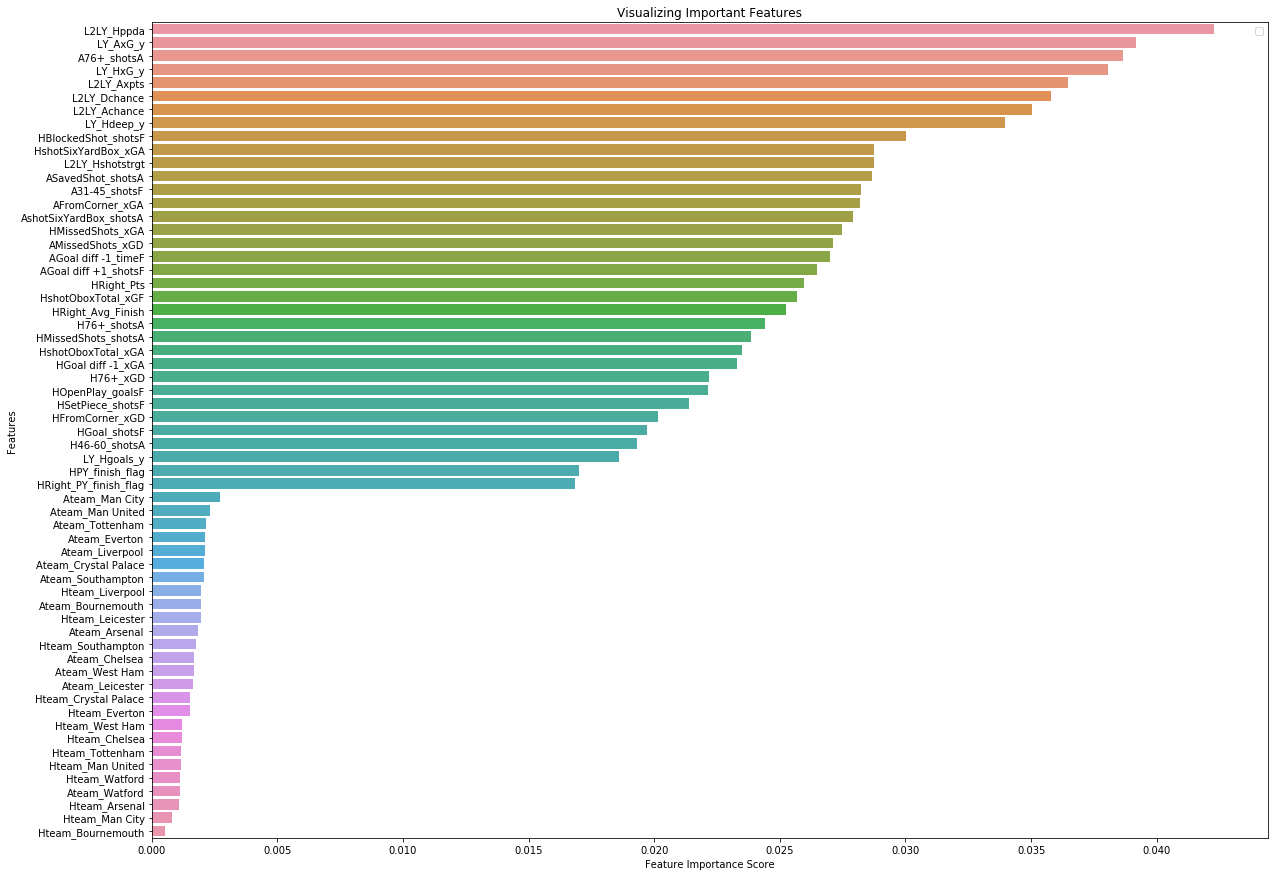

In [42]:
%matplotlib inline
import seaborn as sns
fig = plt.figure(figsize=(20,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [43]:
home_team=[]
away_team=[]
model_predict_out=[]
actual_out=[]
for i in range(0,X_test.shape[0]):
    home_team.append(testdf.HomeTeam.iloc[i])
    away_team.append(testdf.AwayTeam.iloc[i])
    if (rf.predict(X_test)[i]==2):
        model_predict_out.append('Away')
    elif (rf.predict(X_test)[i]==1):
        model_predict_out.append('Home')
    else:
        model_predict_out.append('Draw')
    if (Y_test[i]==2):
        actual_out.append('Away')
    elif (Y_test[i]==1):
        actual_out.append('Home')
    else:
        actual_out.append('Draw')

In [44]:
result=pd.DataFrame(
    {'HomeTeam': home_team,
     'AwayTeam': away_team,
     'Prdctd_Winner': model_predict_out,
     'Actual_Winner':actual_out
    })

In [45]:
result.to_csv('RandomForest_Predictions.csv')

In [46]:
final_metrics(rf,Y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


,Scores
Accuracy,0.546512
Precision,"[0.16666666666666666, 0.5531914893617021, 0.60..."
Recall,"[0.058823529411764705, 0.7027027027027027, 0.625]"
F1 Score,"[0.08695652173913045, 0.6190476190476191, 0.61..."


## Conclusion

### After running all the three models & comparing each models accuracy, recall and predictions. The following can be inferred
- __Logisitic Regression is predicting well for Home and Away wins but throwing spurious results for Draws.The size of the dataset and small subset of Draw instances in the training dataset are the reasons behind such result.__
- __Random Forest Classifier gives some insights about Draws but predictions aren't as accurate as Logisitic Model.__
- __Still the models are in a nascent stage and model optimization is necessary to improve the accuracy and predictions.__
- __Accuracies for all the three models are around 55-60%.__

## Confusion Matrix

![Confusion_Matrix](Confusion_Matrix.jpg)

## Betting Results

![Betting_Results](Betting_Results.png)

## Future Scope 
- __Work on further improving our predictions by exploring new models and engineering better explanatory features.__
- __Operationalizing this model to update every week.__
- __Build a GUI for an easy visualization of actual results, predicted results and their comparisons with betting websites.__

# -----------------------------WORK IN PROGRESS--------------------------